In [ ]:
Consider only the data related to the first 36 patients (leave patients
from 37 to 42 for the testing phase of the learning machine), and store
these data into a new matrix data train. Define the matrix
data test with the data of patients from 37 to 42.

In [4]:
import numpy as np,pandas as pd, matplotlib.pyplot as plt 

if __name__ == '__main__':
    x = pd.read_csv('parkinsons_updrs.data')

    x.test_time = x.test_time - x.test_time.min()
    x.test_time = x.test_time.round()
    
    data_train = x[x.subject < 37]
    data_test = x[x.subject > 36]
    data_train = data_train.groupby(["subject","test_time"]).mean()
    data_test = data_test.groupby (["subject","test_time"]).mean()
    Npatients = x.loc[:,"subject"].max()

It is convenient to normalize the data, so that each feature has mean
zero and variance 1; for each column of the matrix (for each feature)
evaluate the mean and subtract it from the column, then evaluate the
variance and divide the zero-mean column by the square root of the
measured variance. Check that the obtained matrix has zero mean and
unit variance for each feature/column.

In [12]:
    data_test_1 = pd.Series()
    data_test_1 = data_test.copy()
    data_test_norm = pd.Series()
    data_test_norm = data_test.copy()
    data_train_norm = pd.Series()
    data_train_norm = data_train.copy()
    
    data_test_norm = (data_test - data_test.mean())/data_test.std()
    data_train_norm = (data_train - data_train.mean())/data_train.std()

        
    
                
    #uncomment to check that the two vectors are zero mean and with variance = 1
    print ('VARIANCE TRAIN NORM',data_train_norm.var())
    print ('MEAN TRAIN NORM',data_train_norm.mean().round())
    print('DATA_TEST_NORM',data_test_norm.var())
    print('MEAN_TEST NORM',data_test_norm.mean().round())

VARIANCE TRAIN NORM age              1.0
sex              1.0
motor_UPDRS      1.0
total_UPDRS      1.0
Jitter(%)        1.0
Jitter(Abs)      1.0
Jitter:RAP       1.0
Jitter:PPQ5      1.0
Jitter:DDP       1.0
Shimmer          1.0
Shimmer(dB)      1.0
Shimmer:APQ3     1.0
Shimmer:APQ5     1.0
Shimmer:APQ11    1.0
Shimmer:DDA      1.0
NHR              1.0
HNR              1.0
RPDE             1.0
DFA              1.0
PPE              1.0
dtype: float64
MEAN TRAIN NORM age             -0.0
sex              0.0
motor_UPDRS     -0.0
total_UPDRS     -0.0
Jitter(%)       -0.0
Jitter(Abs)      0.0
Jitter:RAP       0.0
Jitter:PPQ5     -0.0
Jitter:DDP       0.0
Shimmer          0.0
Shimmer(dB)      0.0
Shimmer:APQ3     0.0
Shimmer:APQ5     0.0
Shimmer:APQ11    0.0
Shimmer:DDA      0.0
NHR              0.0
HNR             -0.0
RPDE            -0.0
DFA             -0.0
PPE             -0.0
dtype: float64
DATA_TEST_NORM age              1.0
sex              1.0
motor_UPDRS      1.0
total_UPDRS     

Define F0 as the feature that we want to estimate from the other
features; then generate the column vector
y train=data train norm[:,F0] and the matrix X train from
data train norm by removing column F0. Similarly define y_test=data test norm[:,F0]; and X test from
matrix data test norm by removing column F0.

In [14]:
    FO = 'Jitter(%)'
    y_train = data_train_norm[FO]
    X_train = data_train_norm.copy()
    del X_train[FO]
    y_test = data_test_norm[FO]
    X_test = data_test_norm.copy()
    del X_test[FO]

Start by regressing jitter% (column 6 for Python) from the othere features; once this reression works, try and regress total UPDRS.
MINIMUM SQUARED ERROR

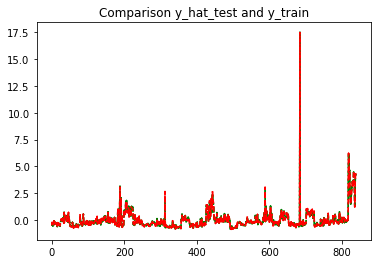

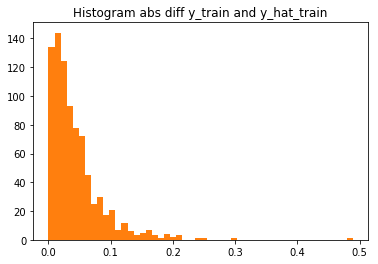

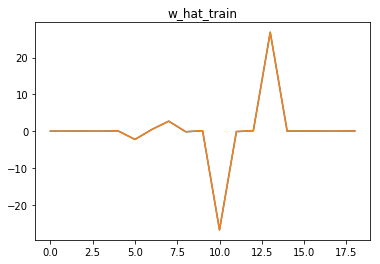

In [26]:
    #application on MSE on train
    w_hat = np.dot(X_train.transpose(),X_train)
    w_hat = np.linalg.pinv(w_hat)
    w_hat = np.dot(w_hat, X_train.transpose())
    w_hat = np.dot(w_hat,y_train)
        
    y_hat_train = np.dot(X_train,w_hat)
   
    error_mse_train = np.dot(y_train.transpose(),y_train)
    second_term = np.dot(y_train.transpose(),y_hat_train)
    error_mse_train = error_mse_train - second_term
    plt.figure(1)
    plt.plot(y_hat_train,'g--',y_train.as_matrix(),'r--')
    plt.title('Comparison y_hat_test and y_train')
    plt.figure(3)
    plt.hist(abs(y_train-y_hat_train),bins=50)
    plt.title('Histogram abs diff y_train and y_hat_train')
    plt.figure(5)
    plt.plot(w_hat)
    plt.title('w_hat_train')
    plt.show()

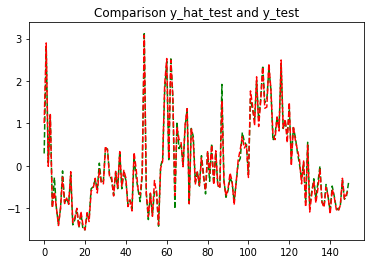

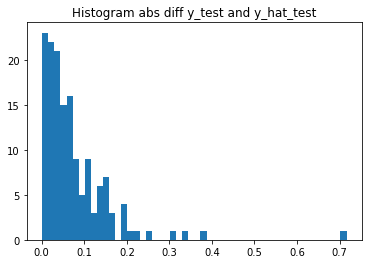

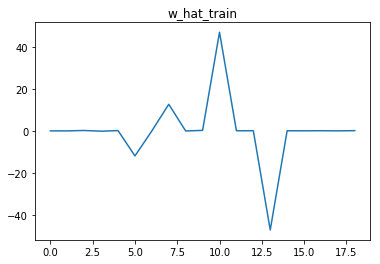

In [27]:
    #application on MSE on test
    w_hat = np.dot(X_test.transpose(),X_test)
    w_hat = np.linalg.pinv(w_hat)
    w_hat = np.dot(w_hat, X_test.transpose())
    w_hat = np.dot(w_hat,y_test)
        
    y_hat_test = np.dot(X_test,w_hat)
       
    error_mse_test = np.dot(y_test.transpose(),y_hat_test)

    second_term = np.dot(y_test.transpose(),y_hat_test)
    error_mse_test = error_mse_test - second_term
    plt.figure(2)
    plt.plot(y_hat_test,'g--',y_test.as_matrix(),'r--')
    plt.title('Comparison y_hat_test and y_test')
    plt.figure(4)
    plt.hist(abs(y_test-y_hat_test),bins=50)
    plt.title('Histogram abs diff y_test and y_hat_test')
    plt.figure(6)
    plt.plot(w_hat)
    plt.title('w_hat_train')

    plt.show()

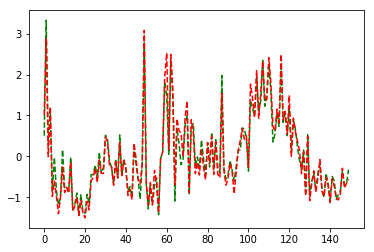

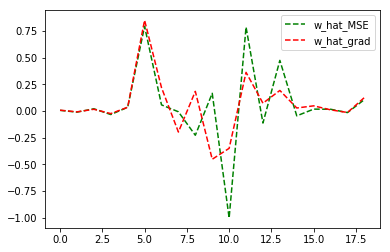

In [40]:
    epsilon = 0.5e-4
    w_hat_grad = w_hat
    w_hat_next = np.random.randn(19,)
    gamma = 8e-6
    while np.linalg.norm(w_hat_next - w_hat_grad) > epsilon:
        w_hat_grad = w_hat_next
        delta_e = -2*np.dot(X_train.transpose(),y_train) + 2*np.dot(np.dot(X_train.transpose(),X_train),w_hat_grad)
        w_hat_next = w_hat_grad - gamma*delta_e
    
    y_hat_gradient_test = np.dot(X_test,w_hat)
    
    plt.figure(1)
    plt.plot(y_hat_gradient_test,'g--',label='gradient')
    plt.plot(y_test.as_matrix(),'r--',label='test')
    plt.figure(2)
    plt.plot(w_hat,'g--',label='w_hat_MSE')
    plt.plot(w_hat_grad,'r--',label = 'w_hat_grad')
    plt.legend()
    plt.show()  
